## The conundrum: 
CAM and CLM treat reference heights *very* differently when computing zeta (a dimensionless height used in Monin-Obukhov theory): 


**CLM:** 
$$ \zeta = \frac{z-d}{L}  $$
<br>
$$ L = -\frac{u_*^3}{k(\frac{1}{\theta_{v,atm}})gQ_0} $$
<br>
<br>

**CAM:**
$$ \zeta = \frac{z_{const}}{L}  $$
<br>
$$ L = -\frac{u_*^3}{k(\frac{1}{T_0})gQ_0} $$
<br>
$$ z_{const} = 1 m $$
$$ T_0 = 300 K $$

### Why would that matter? 
The calculation of surface moments in CLUBB depends on zeta. For example: 
\begin{equation}
\overline{w'^2} = 
\begin{cases}
u_*^2\left[1.75 + 2\left(-\zeta\right)^{\frac{2}{3}}\right],\,\,\zeta < 0\\
1.75u_*^2,\,\,\zeta > 0
\end{cases}
\end{equation}

\begin{equation}
\overline{\theta'^2} = 
\begin{cases}
\frac{Q_0^2}{u_*^2}(4(1-8.3\zeta)^{-2/3}),\,\,\zeta < 0\\
\frac{Q_0^2}{u_*^2}(4),\,\,\zeta > 0
\end{cases}
\end{equation}

\begin{equation}
\overline{q'^2} = 
\begin{cases}
\frac{H_0^2}{u_*^2}(4(1-8.3\zeta)^{-2/3}),\,\,\zeta < 0\\
\frac{H_0^2}{u_*^2}(4),\,\,\zeta > 0
\end{cases}
\end{equation}



So a vastly different value of zeta means a vastly different surface moment depending on if it's computed in CLUBB or in CLM (as we want to do in the CLASP project).

## Problem illustration: 

Ran a series of SCAM simulations at the ARM SGP site, but to simplify things the surface is modified to be just a single PFT, bare ground. When CLM has a bare ground patch, its calculation of zeta depends only on the reference height, not on any measure of rougness or displacement.


In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import xarray as xr
import pandas as pd


**Read in data**

In [14]:
## Read in history and log files (scm_iop_land_srf = .false.)
dataDir = '/Users/mdfowler/Documents/Analysis/CLASP/ZetaIssue/'

zconst32p5_camDS = xr.open_dataset(dataDir+'FSCAM.T42_T42.arm97.Zconst32p5_useAndre-64levs.SrfMod-BareGroundOnly.cam.h0.2015-05-31-00000.nc', decode_times=True)
zconst32p5_clmDS = xr.open_dataset(dataDir+'FSCAM.T42_T42.arm97.Zconst32p5_useAndre-64levs.SrfMod-BareGroundOnly.clm2.h0.2015-05-31-00000.nc', decode_times=True)

with open(dataDir+'FSCAM.T42_T42.arm97.Zconst32p5_useAndre-64levs.SrfMod-BareGroundOnly_atmLog') as f:
    zconst32p5_atmLog = f.readlines()
with open(dataDir+'FSCAM.T42_T42.arm97.Zconst32p5_useAndre-64levs.SrfMod-BareGroundOnly_lndLog') as f:
    zconst32p5_lndLog = f.readlines()

zconst1_camDS = xr.open_dataset(dataDir+'FSCAM.T42_T42.arm97.Zconst1_useAndre-64levs.SrfMod-BareGroundOnly.cam.h0.2015-05-31-00000.nc', decode_times=True)
zconst1_clmDS = xr.open_dataset(dataDir+'FSCAM.T42_T42.arm97.Zconst1_useAndre-64levs.SrfMod-BareGroundOnly.clm2.h0.2015-05-31-00000.nc', decode_times=True)

with open(dataDir+'FSCAM.T42_T42.arm97.Zconst1_useAndre-64levs.SrfMod-BareGroundOnl_atmLog') as f:
    zconst1_atmLog = f.readlines()
with open(dataDir+'FSCAM.T42_T42.arm97.Zconst1_useAndre-64levs.SrfMod-BareGroundOnl_lndLog') as f:
    zconst1_lndLog = f.readlines()

# Plust a test of a case where scm_iop_land_srf = .true.
zconst32p5_camDS_landSrf = xr.open_dataset(dataDir+'FSCAM.T42_T42.arm97.Zconst32_useAndre-64levs.SrfMod-BareGroundOnly.scm_iop_land_srf.cam.h0.2015-05-31-00000.nc', decode_times=True)


In [5]:
# ## Read in history and log files (scm_iop_land_srf = .true.)
# dataDir = '/Users/mdfowler/Documents/Analysis/CLASP/ZetaIssue/'

# zconst32p5_camDS = xr.open_dataset(dataDir+'FSCAM.T42_T42.arm97.Zconst32_useAndre-64levs.SrfMod-BareGroundOnly.scm_iop_land_srf.cam.h0.2015-05-31-00000.nc', decode_times=True)
# zconst32p5_clmDS = xr.open_dataset(dataDir+'FSCAM.T42_T42.arm97.Zconst32_useAndre-64levs.SrfMod-BareGroundOnly.scm_iop_land_srf.clm2.h0.2015-05-31-00000.nc', decode_times=True)

# with open(dataDir+'FSCAM.T42_T42.arm97.Zconst32_useAndre-64levs.SrfMod-BareGroundOnly.scm_iop_land_srf_atmLog') as f:
#     zconst32p5_atmLog = f.readlines()
# with open(dataDir+'FSCAM.T42_T42.arm97.Zconst32_useAndre-64levs.SrfMod-BareGroundOnly.scm_iop_land_srf_lndLog') as f:
#     zconst32p5_lndLog = f.readlines()

# zconst1_camDS = xr.open_dataset(dataDir+'FSCAM.T42_T42.arm97.Zconst1_useAndre-64levs.SrfMod-BareGroundOnly.scm_iop_land_srf.cam.h0.2015-05-31-00000.nc', decode_times=True)
# zconst1_clmDS = xr.open_dataset(dataDir+'FSCAM.T42_T42.arm97.Zconst1_useAndre-64levs.SrfMod-BareGroundOnly.scm_iop_land_srf.clm2.h0.2015-05-31-00000.nc', decode_times=True)

# with open(dataDir+'FSCAM.T42_T42.arm97.Zconst1_useAndre-64levs.SrfMod-BareGroundOnly.scm_iop_land_srf_atmLog') as f:
#     zconst1_atmLog = f.readlines()
# with open(dataDir+'FSCAM.T42_T42.arm97.Zconst1_useAndre-64levs.SrfMod-BareGroundOnly.scm_iop_land_srf_lndLog') as f:
#     zconst1_lndLog = f.readlines()



In [15]:
## Go through log files to pull out data not already saved out: 
## -------------------------------------------------------------

# First get where each output for a timestep ends

endTimeLines_atm32p5 = []
for iLines in range(len(zconst32p5_atmLog)):
    if zconst32p5_atmLog[iLines].startswith('WSHIST: writing time sample ')==True:
        endTimeLines_atm32p5 = np.append(endTimeLines_atm32p5,iLines)
        
endTimeLines_atm1 = []
for iLines in range(len(zconst1_atmLog)):
    if zconst1_atmLog[iLines].startswith('WSHIST: writing time sample ')==True:
        endTimeLines_atm1 = np.append(endTimeLines_atm1,iLines)

endTimeLines_lnd1 = []
for iLines in range(len(zconst1_lndLog)):
    if zconst1_lndLog[iLines].startswith(' clm: completed timestep  ')==True:
        endTimeLines_lnd1 = np.append(endTimeLines_lnd1,iLines)

endTimeLines_lnd32p5 = []
for iLines in range(len(zconst32p5_lndLog)):
    if zconst32p5_lndLog[iLines].startswith(' clm: completed timestep  ')==True:
        endTimeLines_lnd32p5 = np.append(endTimeLines_lnd32p5,iLines)
     
        
# Now get the last value of zeta and zldis in CAM and CLM files per timestep:
clubb_zeta_32p5 = []
clubb_zeta_1    = []
clm_zldis_32p5  = []
clm_zldis_1     = []

for iTimes in range(len(endTimeLines_atm1)):
    if iTimes==0: 
        timestepSection_atm32p5 = zconst32p5_atmLog[0:int(endTimeLines_atm32p5[iTimes])]
        timestepSection_atm1    = zconst1_atmLog[0:int(endTimeLines_atm1[iTimes])]
        timestepSection_lnd32p5 = zconst32p5_lndLog[0:int(endTimeLines_lnd32p5[iTimes])]
        timestepSection_lnd1    = zconst1_lndLog[0:int(endTimeLines_lnd1[iTimes])]
        
    else:
        timestepSection_atm32p5 = zconst32p5_atmLog[int(endTimeLines_atm32p5[iTimes-1]):int(endTimeLines_atm32p5[iTimes])]
        timestepSection_atm1    = zconst1_atmLog[int(endTimeLines_atm1[iTimes-1]):int(endTimeLines_atm1[iTimes])]
        timestepSection_lnd32p5 = zconst32p5_lndLog[int(endTimeLines_lnd32p5[iTimes-1]):int(endTimeLines_lnd32p5[iTimes])]
        timestepSection_lnd1    = zconst1_lndLog[int(endTimeLines_lnd1[iTimes-1]):int(endTimeLines_lnd1[iTimes])]
        
    lineZeta_32p5   = [item for item in timestepSection_atm32p5 if item.startswith(' MDF:   CLUBB Value of zeta  =')]
    strArr          = lineZeta_32p5[-1].split('=')
    zeta32          = strArr[1].split('\n')
    clubb_zeta_32p5 = np.append(clubb_zeta_32p5, float(zeta32[0]))

    lineZeta_1      = [item for item in timestepSection_atm1 if item.startswith(' MDF:   CLUBB Value of zeta  =')]
    strArr          = lineZeta_1[-1].split('=')
    zeta1           = strArr[1].split('\n')
    clubb_zeta_1    = np.append(clubb_zeta_1, float(zeta1[0]))


    lineZldis_32p5  = [item for item in timestepSection_lnd32p5 if item.startswith(' MDF:  Value of zldis (patch):')]
    strArr          = lineZldis_32p5[-1].split(':')
    zldis32         = strArr[2].split('\n')
    clm_zldis_32p5  = np.append(clm_zldis_32p5, float(zldis32[0]))

    lineZldis_1     = [item for item in timestepSection_lnd1 if item.startswith(' MDF:  Value of zldis (patch):')]
    strArr          = lineZldis_1[-1].split(':')
    zldis1          = strArr[2].split('\n')
    clm_zldis_1     = np.append(clm_zldis_1, float(zldis1[0]))   


In [16]:
# Get time array 
zconst32p5_camDS['time']  = zconst32p5_camDS.indexes['time'].to_datetimeindex()
times      = pd.DatetimeIndex(zconst32p5_camDS['time'].values,tz='UTC')


<ipython-input-16-537d865859af>:2: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  zconst32p5_camDS['time']  = zconst32p5_camDS.indexes['time'].to_datetimeindex()


### The default setting of z_const results in a dramatically different (smaller) value of zeta compared to what's used in CLM.


Text(0.5, 0, 'Time (UTC)')

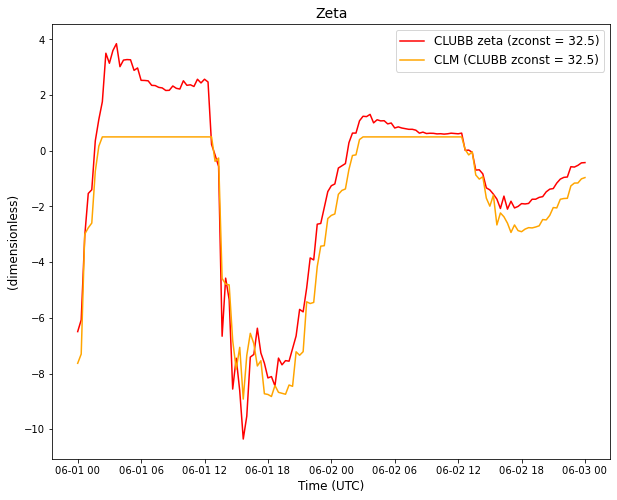

In [17]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

ax1.plot(times[72::],clubb_zeta_32p5[72::],'r',label='CLUBB zeta (zconst = 32.5)')
# ax1.plot(times[72::],clubb_zeta_1[72::],'dodgerblue',label='CLUBB zeta (zconst = 1m)')
ax1.plot(times[72::],np.squeeze(zconst32p5_clmDS.ZETA.values)[72::],'orange',label='CLM (CLUBB zconst = 32.5)')
# ax1.plot(times[72::],np.squeeze(zconst1_clmDS.ZETA.values)[72::],'orange',label='CLM (CLUBB zconst = 1)')
ax1.legend(fontsize=12)
ax1.set_title('Zeta',fontsize=14)
ax1.set_ylabel('(dimensionless)',fontsize=12)
ax1.set_xlabel('Time (UTC)',fontsize=12)


Text(0.5, 0, 'Time (UTC)')

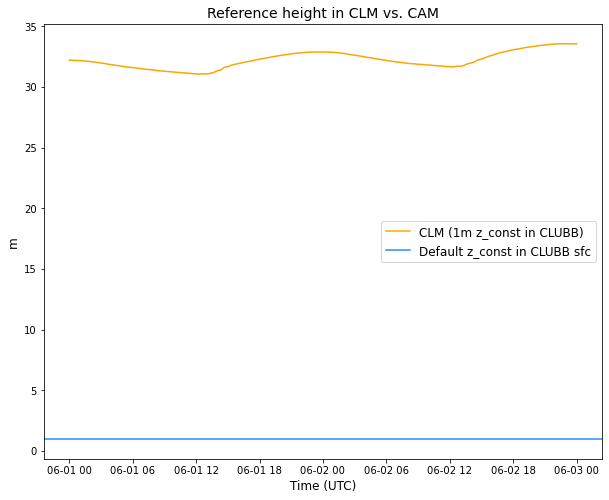

In [18]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

#ax1.plot(times,clm_zldis_32p5,'g',label='CLM (32.5m z_const in CLUBB)')
ax1.plot(times[72::],clm_zldis_1[72::],'orange',label='CLM (1m z_const in CLUBB)')
ax1.axhline(1,color='dodgerblue',label='Default z_const in CLUBB sfc')
ax1.legend(fontsize=12)
ax1.set_title('Reference height in CLM vs. CAM',fontsize=14)
ax1.set_ylabel('m',fontsize=12)
ax1.set_xlabel('Time (UTC)',fontsize=12)


Text(0.5, 0, 'Time (UTC)')

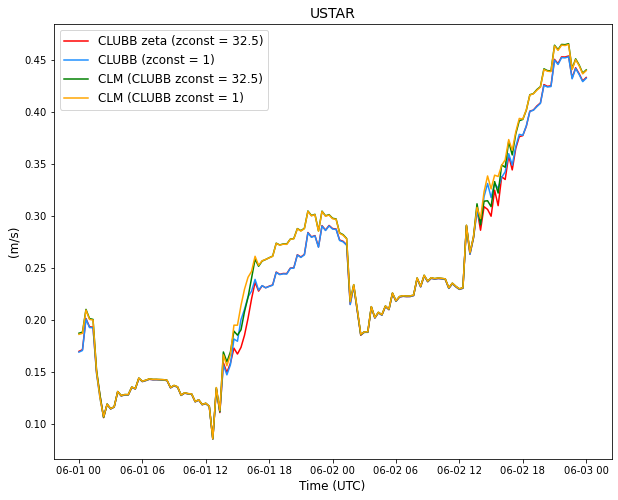

In [19]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

ax1.plot(times[72::],np.squeeze(zconst32p5_camDS.USTAR.values)[72::],'r',label='CLUBB zeta (zconst = 32.5)')
ax1.plot(times[72::],np.squeeze(zconst1_camDS.USTAR.values)[72::],'dodgerblue',label='CLUBB (zconst = 1)')
ax1.plot(times[72::],np.squeeze(zconst32p5_clmDS.USTAR.values)[72::],'g',label='CLM (CLUBB zconst = 32.5)')
ax1.plot(times[72::],np.squeeze(zconst1_clmDS.USTAR.values)[72::],'orange',label='CLM (CLUBB zconst = 1)')
ax1.legend(fontsize=12)
ax1.set_title('USTAR',fontsize=14)
ax1.set_ylabel('(m/s)',fontsize=12)
ax1.set_xlabel('Time (UTC)',fontsize=12)




Text(0.5, 0, 'Time (UTC)')

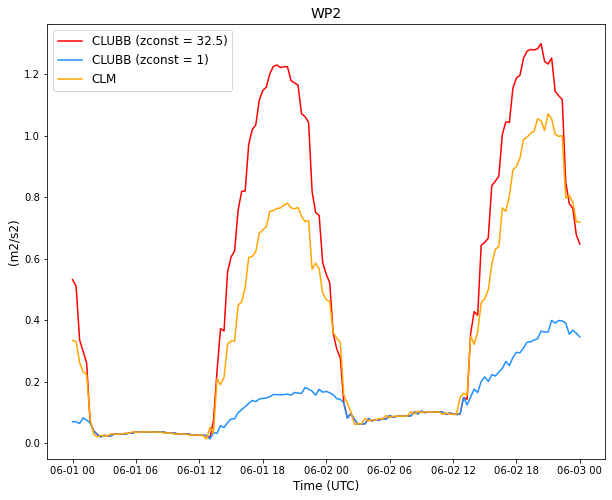

In [20]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

ax1.plot(times[72::],np.squeeze(zconst32p5_camDS.WP2_CLUBB.values)[72::,-1],'red',label='CLUBB (zconst = 32.5)')
ax1.plot(times[72::],np.squeeze(zconst1_camDS.WP2_CLUBB.values)[72::,-1],'dodgerblue',label='CLUBB (zconst = 1)')
ax1.plot(times[72::],np.squeeze(zconst32p5_clmDS.WP2_CLUBB.values)[72::],'orange',label='CLM')
# ax1.plot(times[72::],np.squeeze(zconst1_clmDS.WP2_CLUBB.values)[72::],'orange',label='CLM')

ax1.legend(fontsize=12)
ax1.set_title('WP2',fontsize=14)
ax1.set_ylabel('(m2/s2)',fontsize=12)
ax1.set_xlabel('Time (UTC)',fontsize=12)



In [21]:
reduce_coef = 0.2

Text(0.5, 0, 'Time (UTC)')

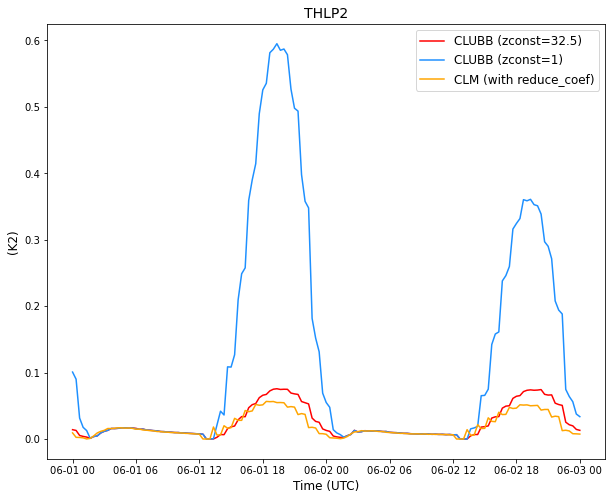

In [22]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

ax1.plot(times[72::],np.squeeze(zconst32p5_camDS.THLP2_CLUBB.values)[72::,-1],'red',label='CLUBB (zconst=32.5)')
ax1.plot(times[72::],np.squeeze(zconst1_camDS.THLP2_CLUBB.values)[72::,-1],'dodgerblue',label='CLUBB (zconst=1)')
ax1.plot(times[72::],np.squeeze(zconst32p5_clmDS.THLP2_CLUBB.values*reduce_coef)[72::],'orange',label='CLM (with reduce_coef)')
#ax1.plot(times[72::],np.squeeze(zconst32p5_clmDS.THLP2_CLUBB.values)[72::],'orange',label='CLM (without reduce_coef)')


# ax1.plot(times[72::],np.squeeze(zconst1_clmDS.THLP2_CLUBB.values)[72::],'orange',label='CLM')


#ax1.plot(times,np.squeeze(zconst1_clmDS.THLP2_CLUBB.values),'orange',label='CLM')
ax1.legend(fontsize=12)
ax1.set_title('THLP2',fontsize=14)
ax1.set_ylabel('(K2)',fontsize=12)
ax1.set_xlabel('Time (UTC)',fontsize=12)


Text(0.5, 0, 'Time (UTC)')

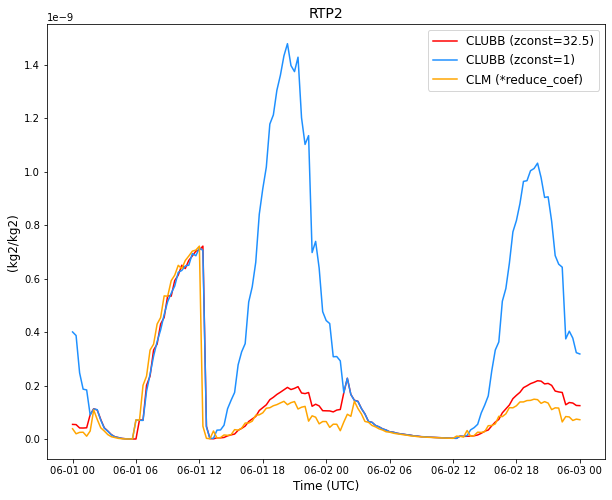

In [23]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

# ax1.plot(times[72::],np.squeeze((zconst32p5_camDS.RTP2_CLUBB.values))[72::,-1],'red',label='CLUBB (zconst=32.5)')
# ax1.plot(times[72::],np.squeeze((zconst1_camDS.RTP2_CLUBB.values))[72::,-1],'dodgerblue',label='CLUBB (zconst=1)')
ax1.plot(times[72::],np.squeeze((zconst32p5_camDS.RTP2_CLUBB.values)*1e-6)[72::,-1],'red',label='CLUBB (zconst=32.5)')
ax1.plot(times[72::],np.squeeze((zconst1_camDS.RTP2_CLUBB.values)*1e-6)[72::,-1],'dodgerblue',label='CLUBB (zconst=1)')
ax1.plot(times[72::],np.squeeze(zconst32p5_clmDS.QP2_CLUBB.values*reduce_coef)[72::],'orange',label='CLM (*reduce_coef)')
# ax1.plot(times[72::],np.squeeze(zconst1_clmDS.QP2_CLUBB.values)[72::],'green',label='CLM')


#ax1.plot(times,np.squeeze(zconst1_clmDS.THLP2_CLUBB.values),'orange',label='CLM')
ax1.legend(fontsize=12)
ax1.set_title('RTP2',fontsize=14)
ax1.set_ylabel('(kg2/kg2)',fontsize=12)
ax1.set_xlabel('Time (UTC)',fontsize=12)




### I have some lingering questions... Why is wp2 not *more* similar? When we tested this before, wp2 was almost identical. 
One difference is that on past runs, I had been setting scm_iop_land_srf=.true. <br>
I stopped that this time because that setting ensures the exact same surface fluxes, temperatures, etc. are used based on the forcing file. But having plotted those out below, they seem pretty identical anyway. So is there something *else* in that setting that's creating stronger agreement? <br>
I also ran the original tests on izumi, and these new ones on Hobart. That shouldn't matter at all, but does it? 

In [131]:
zconst32p5_camDS_landSrf = xr.open_dataset(dataDir+'FSCAM.T42_T42.arm97.Zconst32_useAndre-64levs.SrfMod-BareGroundOnly.scm_iop_land_srf.cam.h0.2015-05-31-00000.nc', decode_times=True)


Text(0.5, 0, 'Time (UTC)')

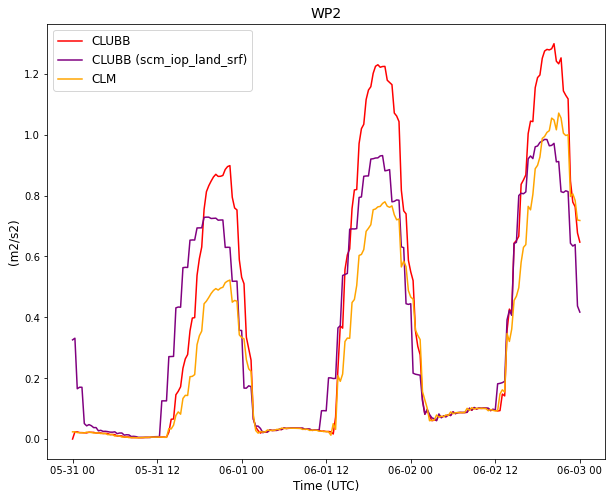

In [132]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

ax1.plot(times,np.squeeze(zconst32p5_camDS.WP2_CLUBB.values)[:,-1],'red',label='CLUBB')
ax1.plot(times,np.squeeze(zconst32p5_camDS_landSrf.WP2_CLUBB.values)[:,-1],'purple',label='CLUBB (scm_iop_land_srf)')
ax1.plot(times,np.squeeze(zconst32p5_clmDS.WP2_CLUBB.values),'orange',label='CLM')

#ax1.plot(times,np.squeeze(zconst1_clmDS.WP2_CLUBB.values),'orange',label='CLM')
ax1.legend(fontsize=12)
ax1.set_title('WP2',fontsize=14)
ax1.set_ylabel('(m2/s2)',fontsize=12)
ax1.set_xlabel('Time (UTC)',fontsize=12)




**Plots of things I think are controlled by scm_iop_land_srf**

Text(0.5, 0, 'Time (UTC)')

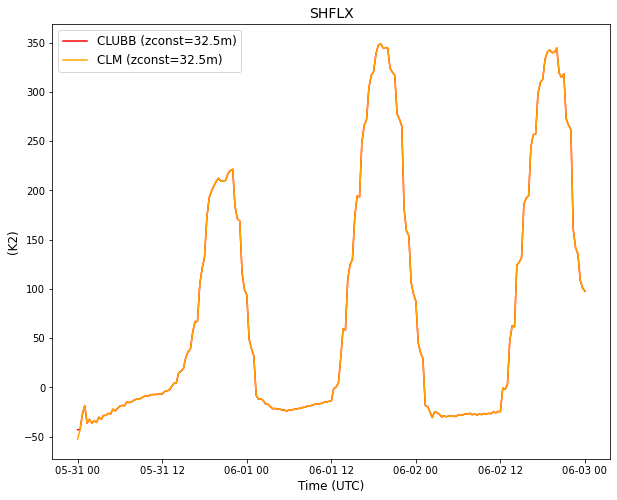

In [129]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

ax1.plot(times,np.squeeze(zconst32p5_camDS.SHFLX.values),'red',label='CLUBB (zconst=32.5m)')
# ax1.plot(times,np.squeeze(zconst1_camDS.SHFLX.values),'dodgerblue',label='CLUBB (zconst=1m)')
ax1.plot(times,np.squeeze(zconst32p5_clmDS.FSH_TO_COUPLER.values),'orange',label='CLM (zconst=32.5m)')
# ax1.plot(times,np.squeeze(zconst1_clmDS.FSH_TO_COUPLER.values),'green',label='CLM (zconst=1m)')

ax1.legend(fontsize=12)
ax1.set_title('SHFLX',fontsize=14)
ax1.set_ylabel('(K2)',fontsize=12)
ax1.set_xlabel('Time (UTC)',fontsize=12)


Text(0.5, 0, 'Time (UTC)')

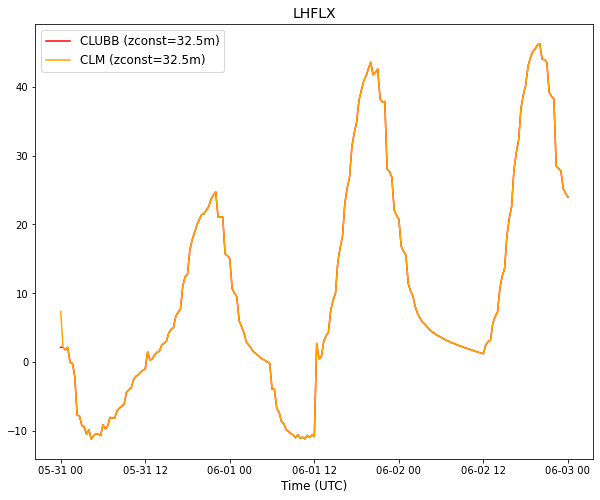

In [128]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

ax1.plot(times,np.squeeze(zconst32p5_camDS.LHFLX.values),'red',label='CLUBB (zconst=32.5m)')
# ax1.plot(times,np.squeeze(zconst1_camDS.LHFLX.values),'dodgerblue',label='CLUBB (zconst=1m)')
ax1.plot(times,np.squeeze(zconst32p5_clmDS.EFLX_LH_TOT.values),'orange',label='CLM (zconst=32.5m)')
# ax1.plot(times,np.squeeze(zconst1_clmDS.EFLX_LH_TOT.values),'green',label='CLM (zconst=1m)')

ax1.legend(fontsize=12)
ax1.set_title('LHFLX',fontsize=14)
ax1.set_xlabel('Time (UTC)',fontsize=12)


Text(0.5, 0, 'Time (UTC)')

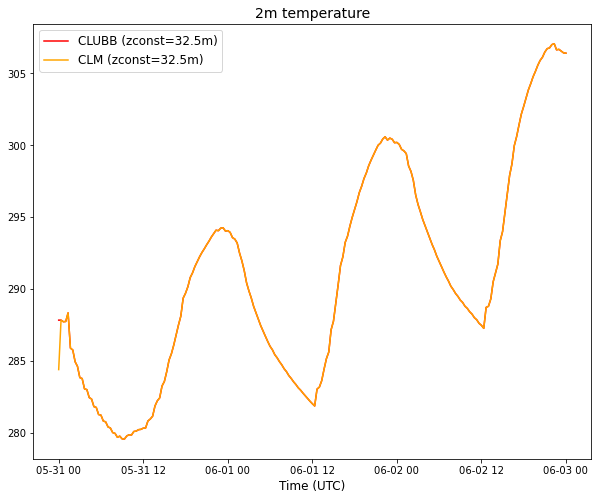

In [127]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

ax1.plot(times,np.squeeze(zconst32p5_camDS.TREFHT.values),'red',label='CLUBB (zconst=32.5m)')
# ax1.plot(times,np.squeeze(zconst1_camDS.TREFHT.values),'dodgerblue',label='CLUBB (zconst=1m)')
ax1.plot(times,np.squeeze(zconst32p5_clmDS.TSA.values),'orange',label='CLM (zconst=32.5m)')
# ax1.plot(times,np.squeeze(zconst1_clmDS.TSA.values),'green',label='CLM (zconst=1m)')

ax1.legend(fontsize=12)
ax1.set_title('2m temperature',fontsize=14)
ax1.set_xlabel('Time (UTC)',fontsize=12)


Text(0.5, 0, 'Time (UTC)')

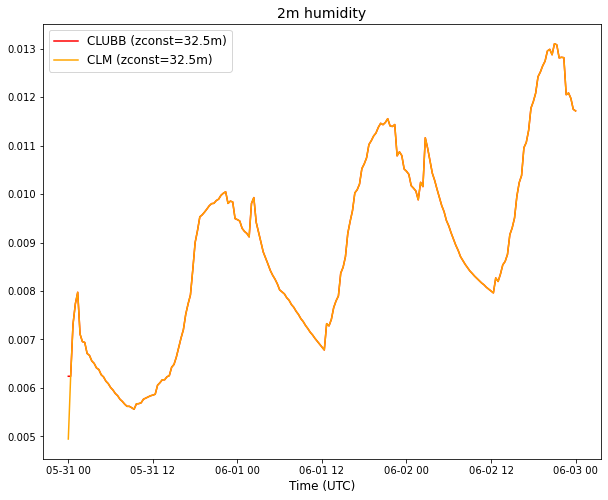

In [126]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

ax1.plot(times,np.squeeze(zconst32p5_camDS.QREFHT.values),'red',label='CLUBB (zconst=32.5m)')
# ax1.plot(times,np.squeeze(zconst1_camDS.QREFHT.values),'dodgerblue',label='CLUBB (zconst=1m)')
ax1.plot(times,np.squeeze(zconst32p5_clmDS.Q2M.values),'orange',label='CLM (zconst=32.5m)')
# ax1.plot(times,np.squeeze(zconst1_clmDS.Q2M.values),'green',label='CLM (zconst=1m)')

ax1.legend(fontsize=12)
ax1.set_title('2m humidity',fontsize=14)
ax1.set_xlabel('Time (UTC)',fontsize=12)



Text(0.5, 0, 'Time (UTC)')

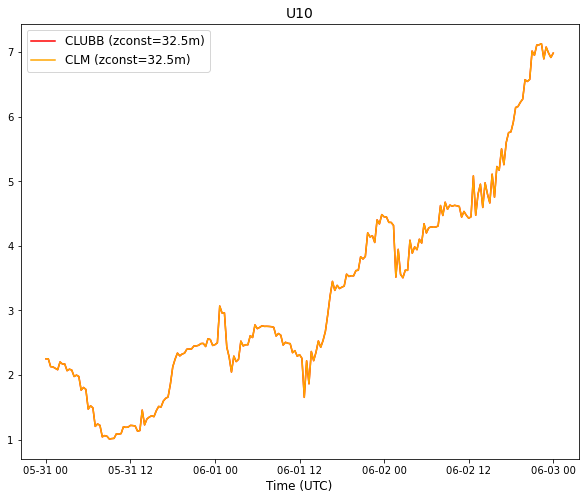

In [125]:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

ax1.plot(times,np.squeeze(zconst32p5_camDS.U10.values),'red',label='CLUBB (zconst=32.5m)')
# ax1.plot(times,np.squeeze(zconst1_camDS.U10.values),'dodgerblue',label='CLUBB (zconst=1m)')
ax1.plot(times,np.squeeze(zconst32p5_clmDS.U10.values),'orange',label='CLM (zconst=32.5m)')
# ax1.plot(times,np.squeeze(zconst1_clmDS.U10.values),'green',label='CLM (zconst=1m)')

ax1.legend(fontsize=12)
ax1.set_title('U10',fontsize=14)
ax1.set_xlabel('Time (UTC)',fontsize=12)


